Objectives : 

- Compare the feature values between the tutor song (normalized and centered) and the Boari et al. synthesizer generated song


# Imports

In [1]:
# Fixed plots
%matplotlib inline
# Dynamic plots
# %matplotlib notebook

import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import sys
import math

import birdsonganalysis as bsa
import utils

sys.path.append('../model/')
from synth import synthesize
from measures import bsa_measure
from song_model import SongModel

np.set_printoptions(precision=3)

# Function and variable definitions

In [2]:
song_name = "boari_short"

sr, tutor = wavfile.read('../data/{}.wav'.format(song_name))
# NORMALIZATION
tutor = tutor.astype(np.int32)
tutor = 2 * (tutor - tutor.min()) / (tutor.max() - tutor.min()) - 1
# CENTERED:
tutor = tutor - np.mean(tutor)

# synth is already NORMALIZED and CENTERED
sr, synth = wavfile.read('../data/{}_out.wav'.format(song_name))

print('mean tutor:', np.mean(tutor))
print('mean synth:', np.mean(synth))

mean tutor: -1.5356508650279592e-18
mean synth: -1.57652370173973e-17


# Sound waves and spectral derivatives 

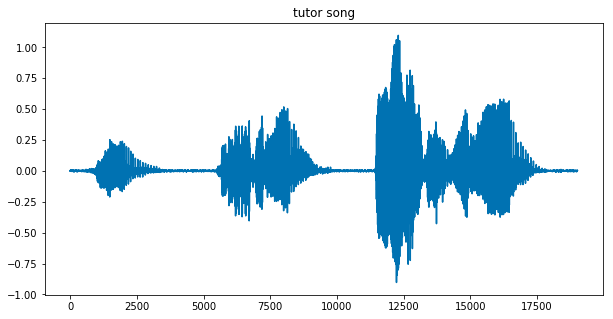

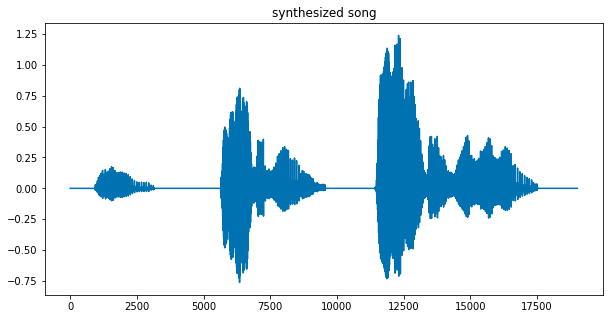

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(tutor)
plt.title("tutor song")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(synth)
plt.title("synthesized song")
plt.show()

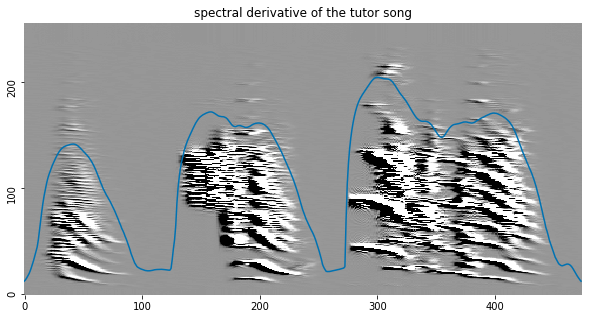

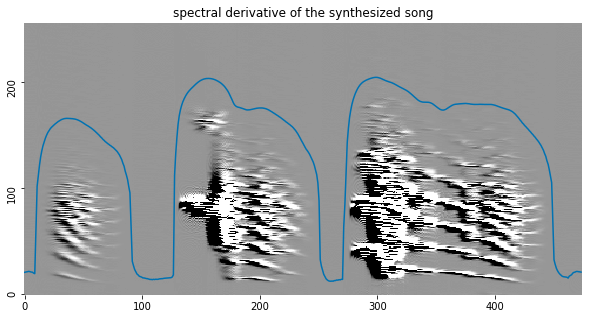

In [4]:
# Spectral derivatives
tspec = bsa.spectral_derivs(tutor, 256, 40, 1024)
sspec = bsa.spectral_derivs(synth, 256, 40, 1024)

fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=ax)
bsa.plot_over_spec(bsa.song_amplitude(tutor, 256, 40, 1024), ax=ax)
plt.title("spectral derivative of the tutor song")
plt.show(fig)

fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(sspec, contrast=0.01, ax=ax)
bsa.plot_over_spec(bsa.song_amplitude(synth, 256, 40, 1024), ax=ax)
plt.title("spectral derivative of the synthesized song")
plt.show(fig)

# Features dict

In [5]:
tutor_feat = bsa.all_song_features(tutor, sr, freq_range=256, fft_size=1024, fft_step=40)
synth_feat = bsa.all_song_features(synth, sr, freq_range=256, fft_size=1024, fft_step=40)

# Plots of features evolution during the song

In [6]:
fnames = ['fm', 'am', 'entropy', 'goodness', 'amplitude']

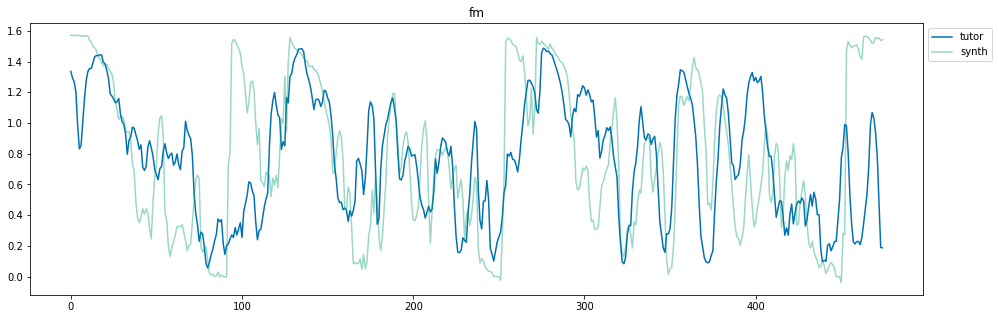

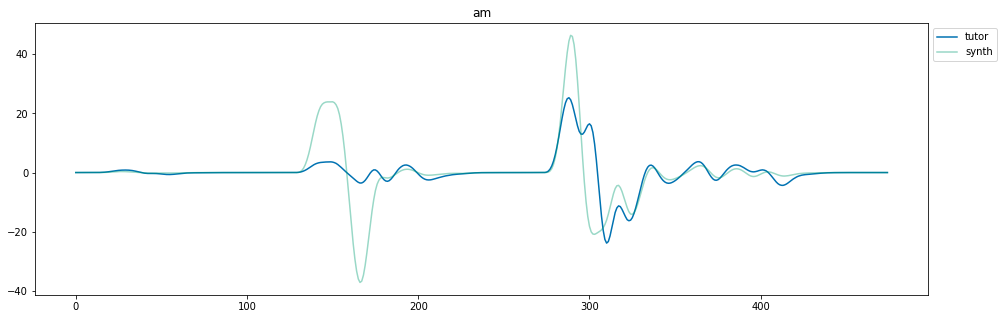

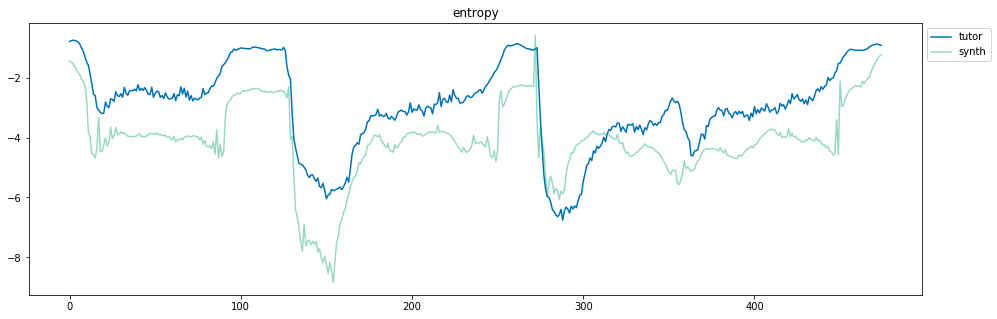

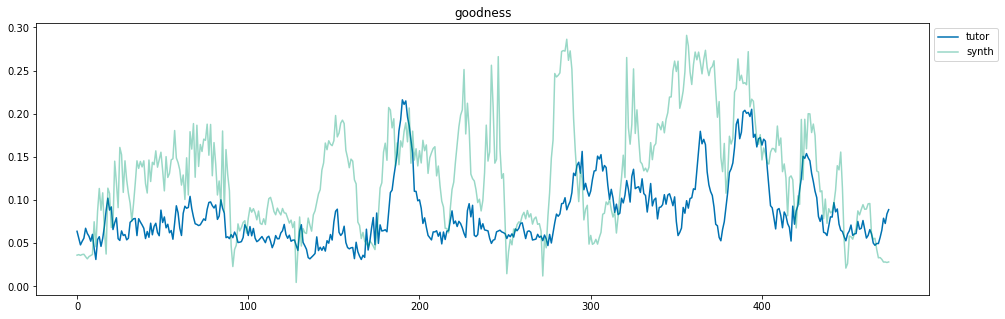

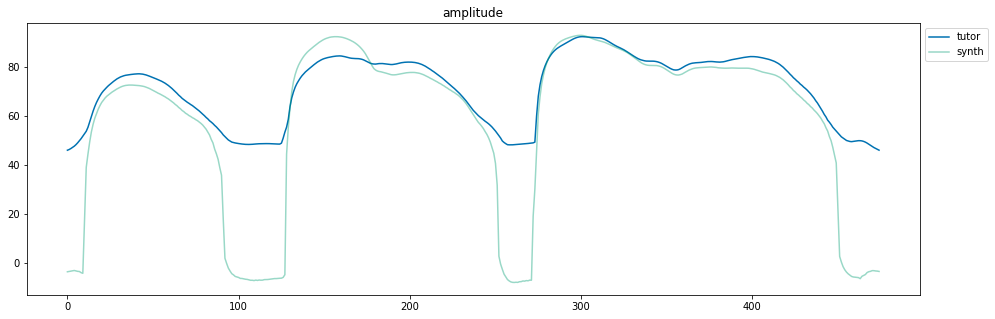

In [7]:
for feat in fnames:
    plt.figure(figsize=(16, 5))
    plt.plot(tutor_feat[feat], label="tutor")
    plt.plot(synth_feat[feat], alpha=0.4, label="synth")
    plt.title(feat)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")